<a href="https://colab.research.google.com/github/mkbahk/AmazonBraket/blob/main/Getting_Started_with_GHZstate_Qiskit_Unitary_AerSimulator_mkbahk_20241023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pip install qiskit[visualization]==1.2.4
%pip install qiskit-aer==0.15.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 69.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 7.9 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=f10c882175e8a8240dec9fa8ea2bf985c0a7331c8746ebf8a738b24db32ee0d0
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 48.1 MB/s eta 0:00:00


In [2]:
%pip show qiskit qiskit_aer

Name: qiskit
Version: 1.2.4
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-aer
---
Name: qiskit-aer
Version: 0.15.1
Summary: Aer - High performance simulators for Qiskit
Home-page: https://github.com/Qiskit/qiskit-aer
Author: AER Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, psutil, qiskit, scipy
Required-by: 


In [3]:
%pip list

Package                            Version
---------------------------------- -------------------
absl-py                            1.4.0
accelerate                         0.34.2
aiohappyeyeballs                   2.4.3
aiohttp                            3.10.10
aiosignal                          1.3.1
alabaster                          0.7.16
albucore                           0.0.19
albumentations                     1.4.20
altair                             4.2.2
annotated-types                    0.7.0
anyio                              3.7.1
argon2-cffi                        23.1.0
argon2-cffi-bindings               21.2.0
array_record                       0.5.1
arviz                              0.20.0
astropy                            6.1.4
astropy-iers-data                  0.2024.10.28.0.34.7
astunparse                         1.6.3
async-timeout                      4.0.3
atpublic                           4.1.0
attrs                              24.2.0
audioread        

In [4]:
import qiskit
qiskit.__version__

'1.2.4'

In [5]:
import qiskit_aer
qiskit_aer.__version__

'0.15.1'

In [6]:
from qiskit_aer import Aer, AerSimulator, QasmSimulator, StatevectorSimulator, UnitarySimulator
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator')]

In [7]:
Aer

In [ ]:
AerSimulator()

AerSimulator('aer_simulator')

In [8]:
QasmSimulator()

QasmSimulator('qasm_simulator')

In [9]:
StatevectorSimulator()

StatevectorSimulator('statevector_simulator')

In [10]:
UnitarySimulator()

UnitarySimulator('unitary_simulator')

In [11]:
#backend =Aer.get_backend("qasm_simulator")
#backend =Aer.get_backend("aer_simulator_statevector")
#backend =Aer.get_backend("aer_simulator_unitary")
#backend = QasmSimulator()
#backend = StatevectorSimulator()
backend = UnitarySimulator()

In [12]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(3)
circuit.h(0)
circuit.cx(0, 1)
circuit.cx(0, 2)
#circuit.measure_all()  #Unitary Matrix 결과를 얻기위해서는 반드시 주석처리 필요

# The GHZ State

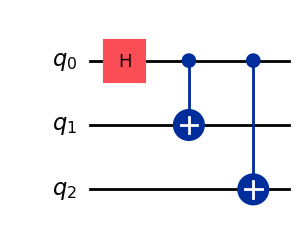

In [13]:
circuit.draw(output="mpl")

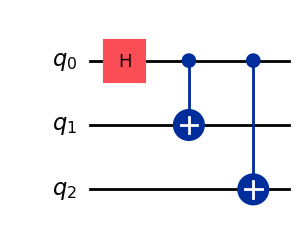

In [14]:
from qiskit.compiler import transpile, assemble
trans_qc = transpile(circuit, backend=backend)
trans_qc.draw("mpl")

In [ ]:
#from qiskit.providers.jobstatus import JobStatus
#import time

#job = backend.run(trans_qc, shots=1024)

#print("Job ID is", job.job_id(),"\n")

# 제출된 잡에 대한 실행 상태 확인
#while job.status() is not JobStatus.DONE:
#	print("Job status is", job.status() )
#	time.sleep(2)
###while


#print("Job status is", job.status() )

# 결과 출력
#counts = job.result().get_counts()
#print(counts)

In [15]:
from qiskit.providers.jobstatus import JobStatus

job = backend.run(trans_qc, shots=1024)
#job = backend.run(circuit, shots=1024)
# Use the job ID to retrieve your job data later
print(f">>> Job ID: {job.job_id()}")

>>> Job ID: 0d578889-857b-44b7-907e-fc0c0887e6ad


In [16]:
print(job.status())

JobStatus.DONE


In [ ]:
### 서비스 플렛폼에 중간에 세션이 종료되었을 경우, Job이 완료되면 그 Job.ID를 이용해 결과를 추출합니다. ###
#job = service.job("csbevjh3olk6fc8cr0n0")

In [17]:
result = job.result()
result

Result(backend_name='unitary_simulator', backend_version='0.15.1', qobj_id='', job_id='0d578889-857b-44b7-907e-fc0c0887e6ad', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(unitary=Operator([[ 0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j,
            0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
            0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
            0.        +0.00000000e+00j,  0.        +0.00000000e+00j],
          [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
            0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
            0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
            0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j],
          [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
            0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j,
            0.        +0.00000000e+00j,  0.        +0.00000000e+00j,

In [18]:
unitary = result.get_unitary()
unitary

Operator([[ 0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j,
            0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
            0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
            0.        +0.00000000e+00j,  0.        +0.00000000e+00j],
          [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
            0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
            0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
            0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j],
          [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
            0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j,
            0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
            0.        +0.00000000e+00j,  0.        +0.00000000e+00j],
          [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
            0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
            0.70710678+0.000000

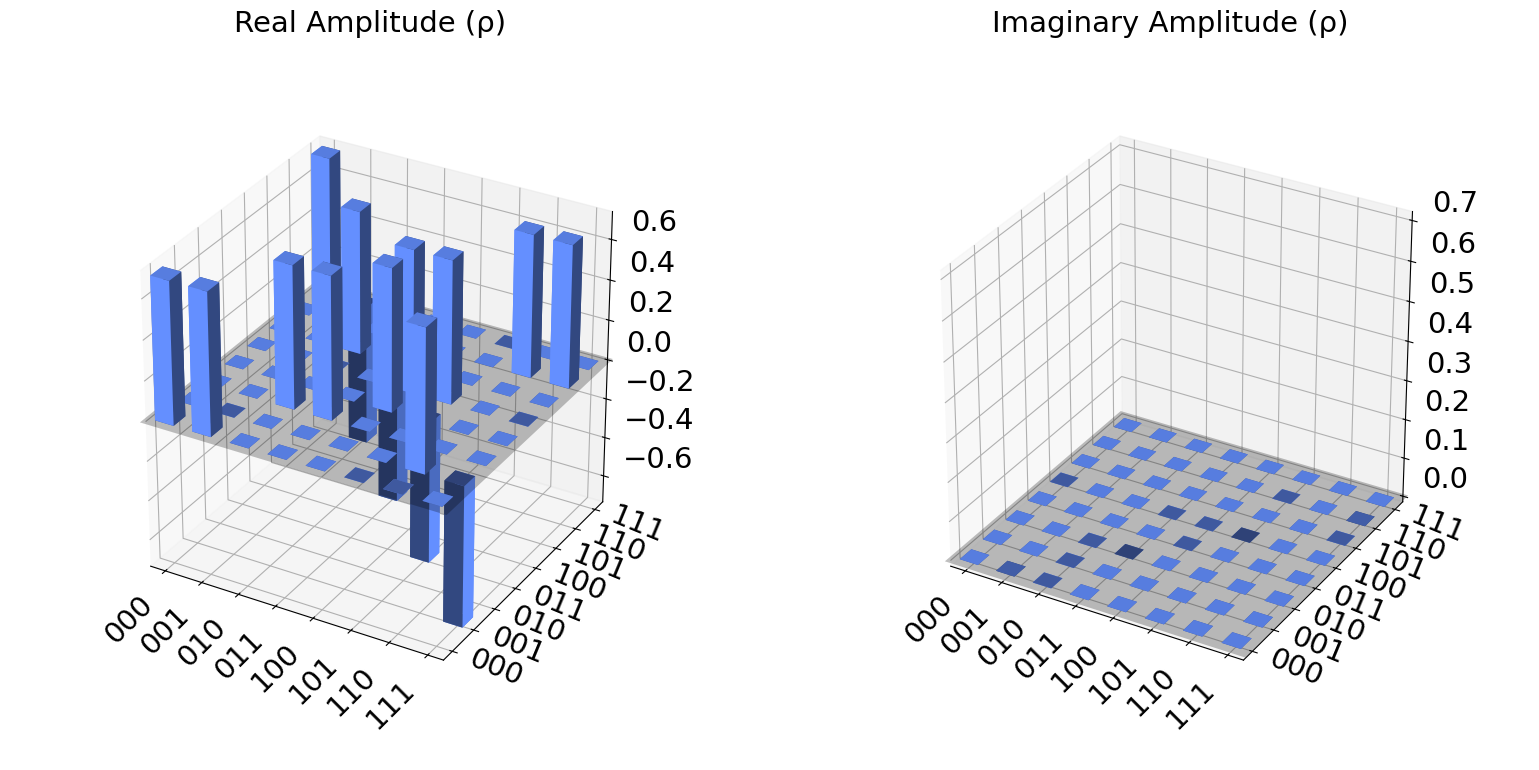

In [19]:
from qiskit.visualization import plot_state_city
plot_state_city(unitary)

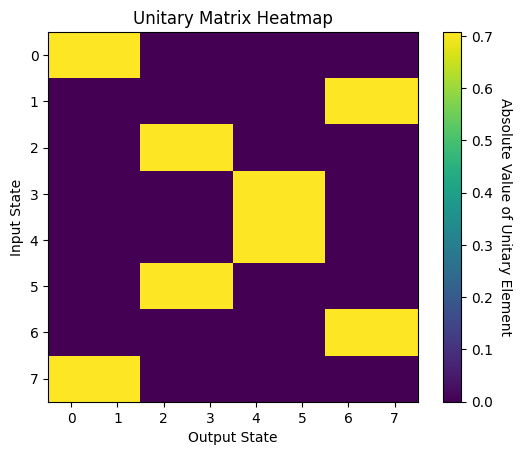

In [22]:
# prompt: 위의 결과인 Unitary Matrix를 heat-map형태로 각 열과 행의 교차지점에 유니타리 벡터값을 출력할 수 있도록 plot하는 코드를 만들어 주세요.

import matplotlib.pyplot as plt
import numpy as np

# Assuming 'unitary' is the Unitary matrix obtained from your code

def plot_unitary_heatmap(unitary):
  """Plots the unitary matrix as a heatmap."""

  fig, ax = plt.subplots()
  im = ax.imshow(np.abs(unitary), cmap='viridis')  # Use absolute values for heatmap

  # Add labels and title
  ax.set_xlabel('Output State')
  ax.set_ylabel('Input State')
  ax.set_title('Unitary Matrix Heatmap')

  # Add colorbar
  cbar = ax.figure.colorbar(im, ax=ax)
  cbar.ax.set_ylabel('Absolute Value of Unitary Element', rotation=-90, va="bottom")

  # Show the plot
  plt.show()

plot_unitary_heatmap(unitary)